In [ ]:
!pip install langdetect

In [ ]:
# Install Libraries
!pip install textblob
!pip install tweepy

In [ ]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Authentication
consumerKey = '398CFhjDeUtvqr5hTst0Mj6Zb'
consumerSecret ='xwBhnGYvyLkWjL3vIShGTSa1dPbWxk28dUxswDiaL6q88v6pJu'
accessToken = '1393937049917399040-onzgrEzq28abboUAGJ49Pq80yCgRlz'
accessTokenSecret = 'Y0vNc4FKtONCgGOQCbYjvKYz9f3kSWVtLBqVFTWh5rVxj'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
SentimentIntensityAnalyzer().polarity_scores('quite good')

{'compound': 0.4927, 'neg': 0.0, 'neu': 0.238, 'pos': 0.762}

In [ ]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input('Please enter keyword or hashtag to search: ')
noOfTweet = int(input ('Please enter how many tweets to analyze: '))
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
#tweets = api.search(q=keyword, count = noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
     negative_list.append(tweet.text)
     negative += 1
 elif pos > neg:
     positive_list.append(tweet.text)
     positive += 1
 
 elif pos == neg:
     neutral_list.append(tweet.text)
     neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: sinovac vaccine
Please enter how many tweets to analyze: 200


Kami memilih kata kunci "sinovac vaccine" karena sebentar lagi kami akan masuk dalam dorm CIT dan kami diberi vaksin sinovac, maka kami ingin tau bagaimana respon orang-orang terhadap vaksin tersebut. <br>

Disini kami mengambil 200 data tweeter untuk di analisa. 

In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  200
positive number:  6
negative number:  12
neutral number:  182


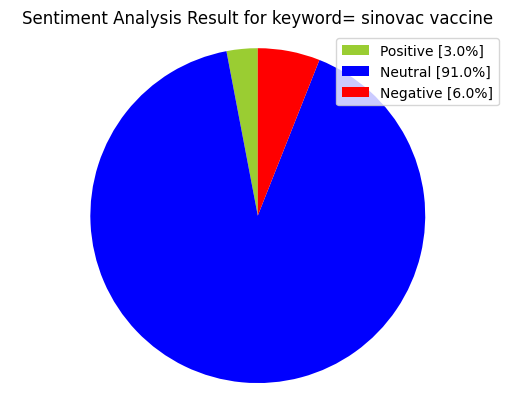

In [ ]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword= '+keyword+'' )
plt.axis('equal')
plt.show()

Melalui grafik pie chart yang telah kami buat, dapat kita lihat bahwa respon masyarakat cenderung netral. Mungkin karena tweet yang banyak di ambil berisi tentang fakta-fakta vaksin tersebut, bukan respon emosional yang kami incar.

In [ ]:
tweet_list

,0
0,"RT @umarmaggi: Alhamdulillah, my dad got his f..."
1,"RT @umarmaggi: Alhamdulillah, my dad got his f..."
2,@sabassheikh Convinced 2 anti vaxers to get va...
3,"RT @umarmaggi: Alhamdulillah, my dad got his f..."
4,"RT @umarmaggi: Alhamdulillah, my dad got his f..."
...,...
195,RT @manopsi: Chile ปูพรม Sinovac แต่ยอดผู้ติดเ...
196,"RT @umarmaggi: Alhamdulillah, my dad got his f..."
197,"RT @umarmaggi: Alhamdulillah, my dad got his f..."
198,"RT @umarmaggi: Alhamdulillah, my dad got his f..."


Dapat kita lihat bahwa banyak data tweet yang diambil berisikan kata-kata yang sama, maka kami melakukan drop duplicates. 

In [ ]:
tweet_list.drop_duplicates(inplace = True)

In [ ]:
tweet_list

,0
0,"RT @umarmaggi: Alhamdulillah, my dad got his f..."
2,@sabassheikh Convinced 2 anti vaxers to get va...
6,Vaccine.SinoVac Dose 2 end❤🤟 https://t.co/BUd9...
7,RT @PakAnalyzer: Exposing yet another hypocris...
9,"RT @Par1Ke: 9. In #Brazil, Sinovac's trials yi..."
10,RT @anadoluagency: Spain welcoming tourists fr...
18,RT @PeterHanna1: كما أجازت منظمة الصحة العالمي...
22,"Presenting.... Antivax most hated 😂\n\nFYI, Pf..."
25,@forcethestars ohh they took the sinovac coron...
33,RT @daddyhope: I his letter to @afreximbank re...


Lalu kami bersihkan data-data tersebut dari simbol-simbol yang tidak berguna.

In [ ]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list['text'] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ','',x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",x)
tw_list['text'] = tw_list.text.map(remove_rt).map(rt)
tw_list['text'] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,"RT @umarmaggi: Alhamdulillah, my dad got his f...",alhamdulillah my dad got his first shot of va...
2,@sabassheikh Convinced 2 anti vaxers to get va...,convinced 2 anti vaxers to get vaccinated to...
6,Vaccine.SinoVac Dose 2 end❤🤟 https://t.co/BUd9...,vaccine sinovac dose 2 end
7,RT @PakAnalyzer: Exposing yet another hypocris...,exposing yet another hypocrisy of pakistan go...
9,"RT @Par1Ke: 9. In #Brazil, Sinovac's trials yi...",9 in brazil sinovac s trials yielded an eff...
10,RT @anadoluagency: Spain welcoming tourists fr...,spain welcoming tourists from turkey worldwid...
18,RT @PeterHanna1: كما أجازت منظمة الصحة العالمي...,...
22,"Presenting.... Antivax most hated 😂\n\nFYI, Pf...",presenting antivax most hated fyi pfiz...
25,@forcethestars ohh they took the sinovac coron...,ohh they took the sinovac coronavac but my a...
33,RT @daddyhope: I his letter to @afreximbank re...,i his letter to regarding the johnson amp ...


In [ ]:
#Sentiment Analyse
#create a function to get subjectivity
def getSubjectivity(text) :
  return TextBlob(text).sentiment.subjectivity

#create a function to get popularity
def getPolarity(text) :
  return TextBlob(text).sentiment.polarity

#create two new columns 
tw_list['Subjectivity']=tw_list['text'].apply(getSubjectivity)
tw_list['Polarity']=tw_list['text'].apply(getPolarity)

#show the new dataframe
tw_list

,0,text,Subjectivity,Polarity
0,"RT @umarmaggi: Alhamdulillah, my dad got his f...",alhamdulillah my dad got his first shot of va...,0.333333,0.250000
2,@sabassheikh Convinced 2 anti vaxers to get va...,convinced 2 anti vaxers to get vaccinated to...,0.400000,0.400000
6,Vaccine.SinoVac Dose 2 end❤🤟 https://t.co/BUd9...,vaccine sinovac dose 2 end,0.000000,0.000000
7,RT @PakAnalyzer: Exposing yet another hypocris...,exposing yet another hypocrisy of pakistan go...,0.500000,-0.300000
9,"RT @Par1Ke: 9. In #Brazil, Sinovac's trials yi...",9 in brazil sinovac s trials yielded an eff...,0.000000,0.000000
10,RT @anadoluagency: Spain welcoming tourists fr...,spain welcoming tourists from turkey worldwid...,0.000000,0.000000
18,RT @PeterHanna1: كما أجازت منظمة الصحة العالمي...,...,0.000000,0.000000
22,"Presenting.... Antivax most hated 😂\n\nFYI, Pf...",presenting antivax most hated fyi pfiz...,0.600000,-0.200000
25,@forcethestars ohh they took the sinovac coron...,ohh they took the sinovac coronavac but my a...,0.000000,0.000000
33,RT @daddyhope: I his letter to @afreximbank re...,i his letter to regarding the johnson amp ...,0.000000,0.000000


Di atas kami menampilkan polaritas masing-masing tweet dan mendapatkan banyak hasil 0, yang berarti cuitan tersebut bersifat netral.

In [ ]:
#create a function to compute sentiment
def getAnalysis(score) :
  if score < 0 :
    return 'Negative'
  elif score == 0 :
    return 'Neutral'
  else :
    return 'Positive'

tw_list['sentiment'] = tw_list['Polarity'].apply(getAnalysis)
tw_list.head(10)

,0,text,Subjectivity,Polarity,sentiment
0,"RT @umarmaggi: Alhamdulillah, my dad got his f...",alhamdulillah my dad got his first shot of va...,0.333333,0.25,Positive
2,@sabassheikh Convinced 2 anti vaxers to get va...,convinced 2 anti vaxers to get vaccinated to...,0.400000,0.40,Positive
6,Vaccine.SinoVac Dose 2 end❤🤟 https://t.co/BUd9...,vaccine sinovac dose 2 end,0.000000,0.00,Neutral
7,RT @PakAnalyzer: Exposing yet another hypocris...,exposing yet another hypocrisy of pakistan go...,0.500000,-0.30,Negative
9,"RT @Par1Ke: 9. In #Brazil, Sinovac's trials yi...",9 in brazil sinovac s trials yielded an eff...,0.000000,0.00,Neutral
10,RT @anadoluagency: Spain welcoming tourists fr...,spain welcoming tourists from turkey worldwid...,0.000000,0.00,Neutral
18,RT @PeterHanna1: كما أجازت منظمة الصحة العالمي...,...,0.000000,0.00,Neutral
22,"Presenting.... Antivax most hated 😂\n\nFYI, Pf...",presenting antivax most hated fyi pfiz...,0.600000,-0.20,Negative
25,@forcethestars ohh they took the sinovac coron...,ohh they took the sinovac coronavac but my a...,0.000000,0.00,Neutral
33,RT @daddyhope: I his letter to @afreximbank re...,i his letter to regarding the johnson amp ...,0.000000,0.00,Neutral


Data-data yang memiliki sentimen positif :

In [ ]:
tw_list_positive = tw_list[tw_list['sentiment']=='Positive']
tw_list_positive

,0,text,Subjectivity,Polarity,sentiment
0,"RT @umarmaggi: Alhamdulillah, my dad got his f...",alhamdulillah my dad got his first shot of va...,0.333333,0.250000,Positive
2,@sabassheikh Convinced 2 anti vaxers to get va...,convinced 2 anti vaxers to get vaccinated to...,0.400000,0.400000,Positive
71,@PriyankaPulla It would be easy to conclude th...,it would be easy to conclude that the reason...,0.833333,0.433333,Positive
173,RT @Cherish_Leow: My father received his first...,my father received his first jab of covid 19 v...,0.777778,0.216667,Positive


In [ ]:
tw_list_positive['text'].values[0]

'alhamdulillah  my dad got his first shot of vaccine    but he got sinovac and the sideeffect is abit worrying     '

Data-data yang memiliki sentimen Negatif :

In [ ]:
tw_list_negative = tw_list[tw_list['sentiment']=='Negative']
tw_list_negative

,0,text,Subjectivity,Polarity,sentiment
7,RT @PakAnalyzer: Exposing yet another hypocris...,exposing yet another hypocrisy of pakistan go...,0.500000,-0.300000,Negative
22,"Presenting.... Antivax most hated 😂\n\nFYI, Pf...",presenting antivax most hated fyi pfiz...,0.600000,-0.200000,Negative
63,@taegijincart @MinHolly_28 ^^ i agree. conside...,28 i agree considering pa na people al...,0.350000,-0.100000,Negative
102,@draensaari Kannnn i thought the same thing ju...,kannnn i thought the same thing jugak apaka...,0.188889,-0.097222,Negative
124,RT @shamimzakaria: China’s Sinovac vaccine gre...,china s sinovac vaccine greenlighted for for...,0.400000,-0.100000,Negative


In [ ]:
tw_list_negative['text'].values[0]

'exposing yet another hypocrisy of  pakistan government  all govt employees will be given  astrazeneca vaccine while common '

Data-data yang memiliki sentimen Netral :

In [ ]:
tw_list_neutral = tw_list[tw_list['sentiment']=='Neutral']
tw_list_neutral

,0,text,Subjectivity,Polarity,sentiment
6,Vaccine.SinoVac Dose 2 end❤🤟 https://t.co/BUd9...,vaccine sinovac dose 2 end,0.0,0.0,Neutral
9,"RT @Par1Ke: 9. In #Brazil, Sinovac's trials yi...",9 in brazil sinovac s trials yielded an eff...,0.0,0.0,Neutral
10,RT @anadoluagency: Spain welcoming tourists fr...,spain welcoming tourists from turkey worldwid...,0.0,0.0,Neutral
18,RT @PeterHanna1: كما أجازت منظمة الصحة العالمي...,...,0.0,0.0,Neutral
25,@forcethestars ohh they took the sinovac coron...,ohh they took the sinovac coronavac but my a...,0.0,0.0,Neutral
33,RT @daddyhope: I his letter to @afreximbank re...,i his letter to regarding the johnson amp ...,0.0,0.0,Neutral
34,RT @Nuu_Nuu_P_9: เต็มเหนี่ยวไปเลยพี่...🎶📢🏆\n\n...,...,0.0,0.0,Neutral
46,كما أجازت منظمة الصحة العالمية، الثلاثاء الاول...,...,0.0,0.0,Neutral
47,Egypt to produce 1st Sinovac vaccine batch ne...,egypt to produce 1st sinovac vaccine batch ne...,0.0,0.0,Neutral
51,RT @nytchinese: 中国制药公司科兴的董事长表示，对“数百人”的临床实验显示，其...,3 17 ...,0.0,0.0,Neutral


In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
tw_list_positive
tw_list_negative
tw_list_neutral
print('total new list: ',len(tweet_list))
print('tw_list_positive: ',len(tw_list_positive), "({} %)".format(100*len(tw_list_positive)/len(tweet_list)))
print('tw_list_negative: ', len(tw_list_negative), "({} %)".format(100*len(tw_list_negative)/len(tweet_list)))
print('tw_list_neutral: ',len(tw_list_neutral), "({} %)".format(100*len(tw_list_neutral)/len(tweet_list)))

total new list:  31
tw_list_positive:  4 (12.903225806451612 %)
tw_list_negative:  5 (16.129032258064516 %)
tw_list_neutral:  22 (70.96774193548387 %)


In [ ]:
SentimentIntensityAnalyzer().polarity_scores('alhamdulillah  my dad got his first shot of vaccine    but he got sinovac and the sideeffect is abit worrying')

{'compound': -0.4767, 'neg': 0.147, 'neu': 0.853, 'pos': 0.0}

In [ ]:
SentimentIntensityAnalyzer().polarity_scores(tw_list_positive['text'].values[0])

{'compound': -0.4767, 'neg': 0.147, 'neu': 0.853, 'pos': 0.0}

In [ ]:
SentimentIntensityAnalyzer().polarity_scores('exposing yet another hypocrisy of  pakistan government  all govt employees will be given  astrazeneca vaccine while common')

{'compound': -0.2732, 'neg': 0.116, 'neu': 0.884, 'pos': 0.0}

In [ ]:
tw_list_negative[0]

7      RT @PakAnalyzer: Exposing yet another hypocris...
22     Presenting.... Antivax most hated 😂\n\nFYI, Pf...
63     @taegijincart @MinHolly_28 ^^ i agree. conside...
102    @draensaari Kannnn i thought the same thing ju...
124    RT @shamimzakaria: China’s Sinovac vaccine gre...
Name: 0, dtype: object

In [ ]:
SentimentIntensityAnalyzer().polarity_scores(' New Line will be CLOSED Sunday &amp; Monday in')

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [ ]:
#Function to Create Wordcloud
def create_wordcloud(text):
 mask = np.array(Image.open('cloud.png'))
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color='white',
 mask = mask,
 max_words=3000,
 stopwords=stopwords,
 repeat=True)
 wc.generate(str(text))
 wc.to_file('wc.png')
 print('Word Cloud Saved Successfully')
 path='wc.png'
 display(Image.open(path))

**Berikut adalah word cloud yang menampilkan kata yang sering muncul** <br>
Word Cloud Negatif 

Word Cloud Saved Successfully


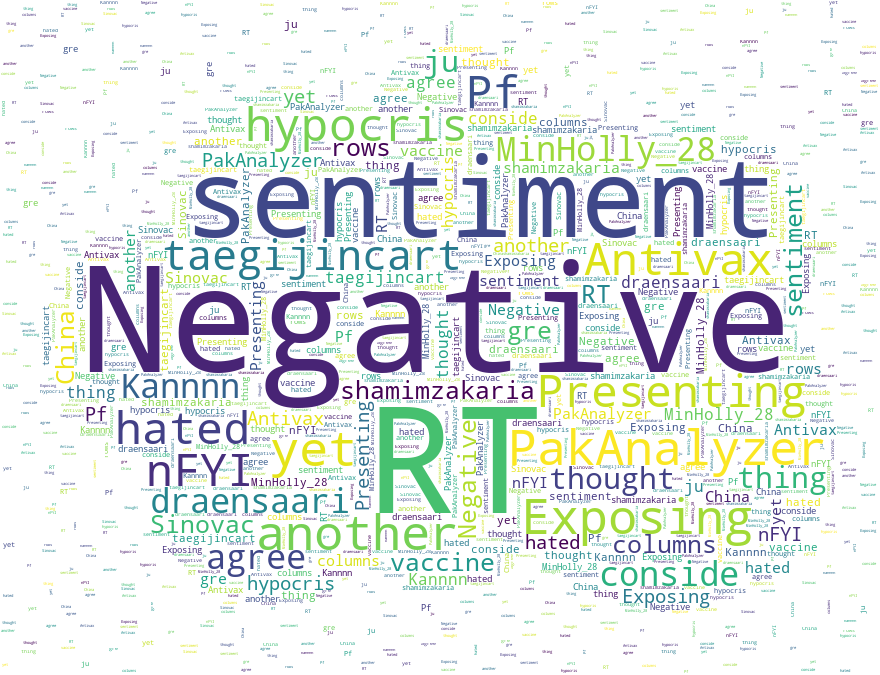

In [ ]:
create_wordcloud(tw_list_negative)

Word Cloud Netral

Word Cloud Saved Successfully


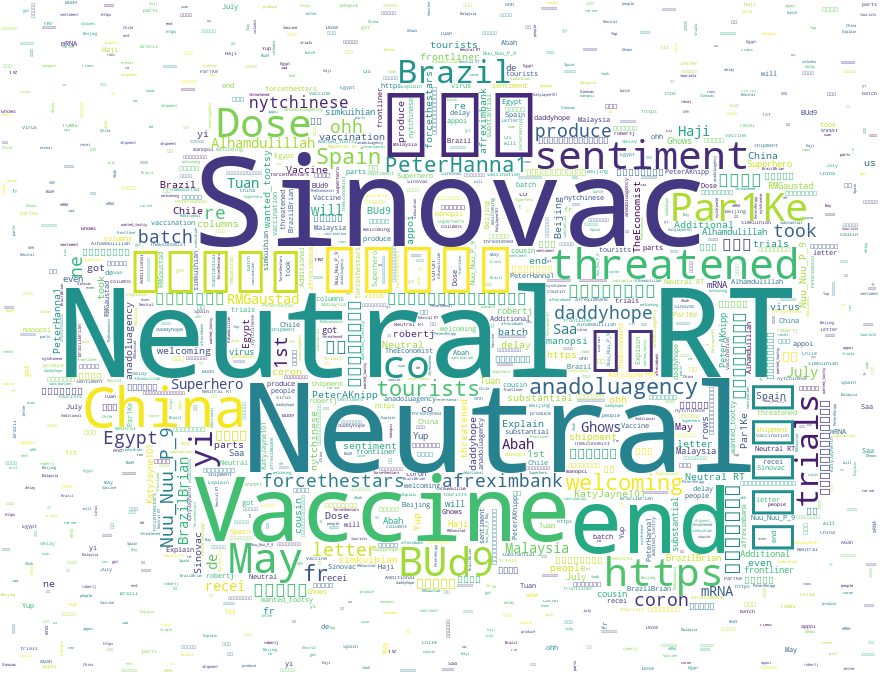

In [ ]:
create_wordcloud(tw_list_neutral)

Word Cloud Positif

Word Cloud Saved Successfully


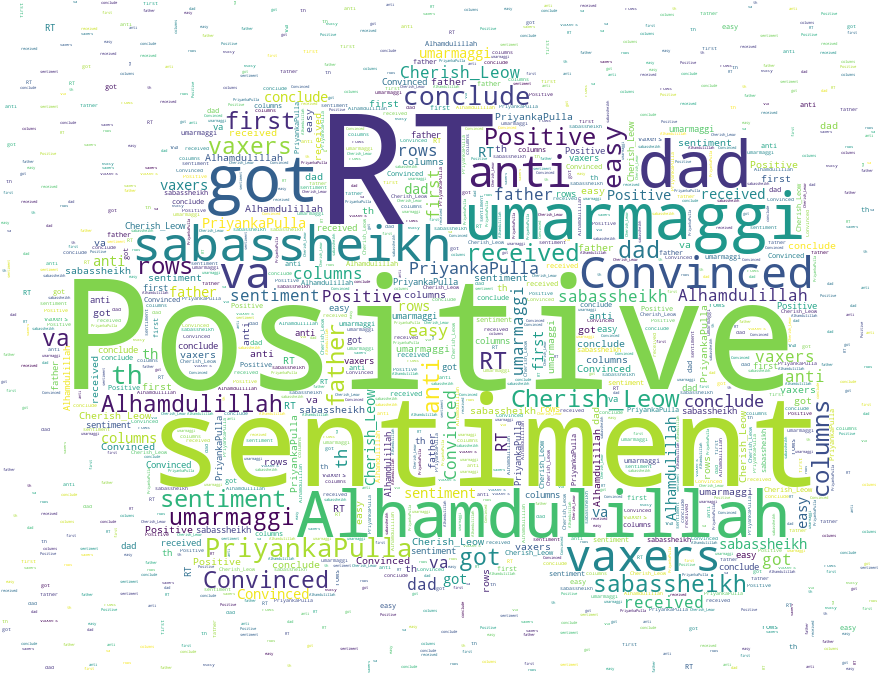

In [ ]:
create_wordcloud(tw_list_positive)